In [13]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import glob
import re

In [6]:
files_n1 = glob.glob("../results/uniform/*n1_*.sfs")

In [7]:
files_n1

['../results/uniform/s0.01_n1_mu1e-08_rho2_L50_maxcount1000_sigma0.2_seed0_iter10000000_r0.1_uniform.sfs',
 '../results/uniform/s0.001_n1_mu1e-08_rho5_L50_maxcount1000_sigma0.2_seed0_iter10000000_r0.1_uniform.sfs',
 '../results/uniform/s0.1_n1_mu1e-07_rho5_L50_maxcount1000_sigma0.2_seed0_iter10000000_r0.1_uniform.sfs',
 '../results/uniform/s0.001_n1_mu1e-07_rho5_L50_maxcount1000_sigma0.2_seed0_iter10000000_r0.1_uniform.sfs',
 '../results/uniform/s0.01_n1_mu1e-07_rho2_L50_maxcount1000_sigma0.2_seed0_iter10000000_r0.1_uniform.sfs',
 '../results/uniform/s0.01_n1_mu0.0001_rho1_L50_maxcount1000_sigma0.2_seed0_iter10000000_r0.1_uniform.sfs',
 '../results/uniform/s0.1_n1_mu1e-08_rho5_L50_maxcount1000_sigma0.2_seed0_iter10000000_r0.1_uniform.sfs',
 '../results/uniform/s0.001_n1_mu1e-07_rho1_L50_maxcount1000_sigma0.2_seed0_iter10000000_r0.1_uniform.sfs',
 '../results/uniform/s0.1_n1_mu1e-08_rho1_L50_maxcount1000_sigma0.2_seed0_iter10000000_r0.1_uniform.sfs',
 '../results/uniform/s0.1_n1_mu0.000

In [8]:
df = pd.read_csv(files_n1[0],header=None)

In [9]:
df

,0
0,9.999991e-01
1,9.173930e-07
2,0.000000e+00
3,0.000000e+00
4,0.000000e+00
...,...
996,0.000000e+00
997,0.000000e+00
998,0.000000e+00
999,0.000000e+00


In [27]:
data = np.zeros((len(files_n1),5))

pattern = r"s([\d.]+)_n([\d.]+)_mu([\d.e-]+)_rho([\d.]+)_L"

for i,f in enumerate(files_n1):
    match = re.search(pattern, f)
    s = float(match.group(1))
    n = float(match.group(2))
    mu = float(match.group(3))
    rho = float(match.group(4))
    df = pd.read_csv(f,header=None)
    k1_n1 = df.loc[1,0]
    data[i,:] = [mu,s,n,rho,k1_n1]

In [28]:
data = pd.DataFrame(data,columns=["mu","s","n","rho","k1_n1"])

In [29]:
data

,mu,s,n,rho,k1_n1
0,1.000000e-08,0.010,1.0,2.0,9.173930e-07
1,1.000000e-08,0.001,1.0,5.0,9.093274e-06
2,1.000000e-07,0.100,1.0,5.0,9.937390e-07
3,1.000000e-07,0.001,1.0,5.0,6.028772e-05
4,1.000000e-07,0.010,1.0,2.0,9.395685e-06
5,1.000000e-04,0.010,1.0,1.0,1.039131e-02
6,1.000000e-08,0.100,1.0,5.0,9.900794e-08
7,1.000000e-07,0.001,1.0,1.0,7.768321e-05
8,1.000000e-08,0.100,1.0,1.0,9.907365e-08
9,1.000000e-04,0.100,1.0,2.0,9.973452e-04


In [30]:
data['mu_over_s'] = data['mu']/data['s']

In [31]:
data

,mu,s,n,rho,k1_n1,mu_over_s
0,1.000000e-08,0.010,1.0,2.0,9.173930e-07,1.000000e-06
1,1.000000e-08,0.001,1.0,5.0,9.093274e-06,1.000000e-05
2,1.000000e-07,0.100,1.0,5.0,9.937390e-07,1.000000e-06
3,1.000000e-07,0.001,1.0,5.0,6.028772e-05,1.000000e-04
4,1.000000e-07,0.010,1.0,2.0,9.395685e-06,1.000000e-05
5,1.000000e-04,0.010,1.0,1.0,1.039131e-02,1.000000e-02
6,1.000000e-08,0.100,1.0,5.0,9.900794e-08,1.000000e-07
7,1.000000e-07,0.001,1.0,1.0,7.768321e-05,1.000000e-04
8,1.000000e-08,0.100,1.0,1.0,9.907365e-08,1.000000e-07
9,1.000000e-04,0.100,1.0,2.0,9.973452e-04,1.000000e-03


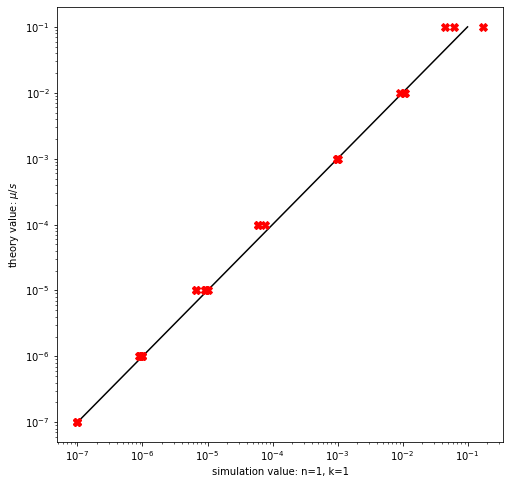

In [66]:
fig,ax = plt.subplots(figsize=(8,8))

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('simulation value: n=1, k=1')
ax.set_ylabel(r'theory value: $\mu$/$s$')
ax.loglog(np.logspace(-7,-1),np.logspace(-7,-1),color='black')
ax.plot(data['k1_n1'],data['mu_over_s'],marker='X',color='red',markersize=8,linestyle='')
plt.show()

In [73]:
files_n1 = glob.glob("../results/gaussian_w1/*n1_*.sfs")

data = np.zeros((len(files_n1),5))

pattern = r"s([\d.]+)_n([\d.]+)_mu([\d.e-]+)_rho([\d.]+)_L"

for i,f in enumerate(files_n1):
    match = re.search(pattern, f)
    s = float(match.group(1))
    n = float(match.group(2))
    mu = float(match.group(3))
    rho = float(match.group(4))
    df = pd.read_csv(f,header=None)
    k1_n1 = df.loc[1,0]
    data[i,:] = [mu,s,n,rho,k1_n1]

data = pd.DataFrame(data,columns=["mu","s","n","rho","k1_n1"])
data['mu_over_s'] = data['mu']/data['s']

In [74]:
data

,mu,s,n,rho,k1_n1,mu_over_s
0,1.000000e-08,0.010,1.0,1.0,5.178462e-07,1.000000e-06
1,1.000000e-04,0.010,1.0,2.0,1.082010e-02,1.000000e-02
2,1.000000e-07,0.100,1.0,2.0,1.134002e-06,1.000000e-06
3,1.000000e-04,0.001,1.0,2.0,2.853240e-02,1.000000e-01
4,1.000000e-07,0.010,1.0,5.0,8.234296e-06,1.000000e-05
5,1.000000e-07,0.001,1.0,5.0,4.712341e-05,1.000000e-04
6,1.000000e-04,0.100,1.0,2.0,8.627570e-04,1.000000e-03
7,1.000000e-08,0.001,1.0,1.0,2.517507e-07,1.000000e-05
8,1.000000e-04,0.010,1.0,5.0,1.511375e-02,1.000000e-02
9,1.000000e-07,0.100,1.0,5.0,1.109477e-06,1.000000e-06


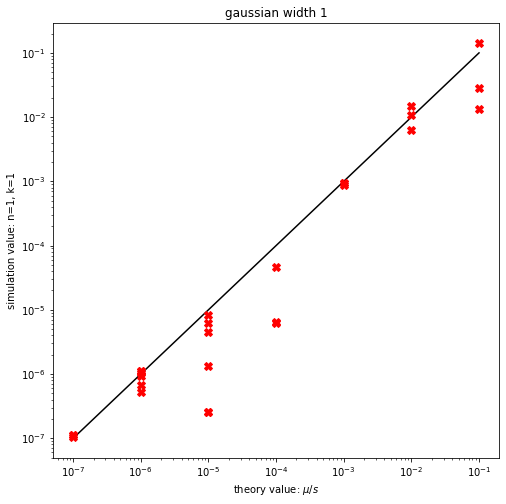

In [77]:
fig,ax = plt.subplots(figsize=(8,8))

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel('simulation value: n=1, k=1')
ax.set_xlabel(r'theory value: $\mu$/$s$')
ax.loglog(np.logspace(-7,-1),np.logspace(-7,-1),color='black')
ax.plot(data['mu_over_s'],data['k1_n1'],marker='X',color='red',markersize=8,linestyle='')
ax.set_title("gaussian width 1")
plt.show()

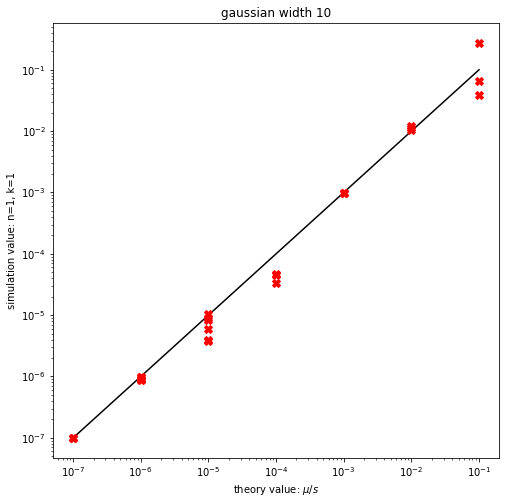

In [78]:
files_n1 = glob.glob("../results/gaussian_w10/*n1_*.sfs")

data = np.zeros((len(files_n1),5))

pattern = r"s([\d.]+)_n([\d.]+)_mu([\d.e-]+)_rho([\d.]+)_L"

for i,f in enumerate(files_n1):
    match = re.search(pattern, f)
    s = float(match.group(1))
    n = float(match.group(2))
    mu = float(match.group(3))
    rho = float(match.group(4))
    df = pd.read_csv(f,header=None)
    k1_n1 = df.loc[1,0]
    data[i,:] = [mu,s,n,rho,k1_n1]

data = pd.DataFrame(data,columns=["mu","s","n","rho","k1_n1"])
data['mu_over_s'] = data['mu']/data['s']

fig,ax = plt.subplots(figsize=(8,8))

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel('simulation value: n=1, k=1')
ax.set_xlabel(r'theory value: $\mu$/$s$')
ax.loglog(np.logspace(-7,-1),np.logspace(-7,-1),color='black')
ax.plot(data['mu_over_s'],data['k1_n1'],marker='X',color='red',markersize=8,linestyle='')
ax.set_title("gaussian width 10")
plt.show()